In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
data = pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Manipulation

In [ ]:
len(data[data['gender'] == 'Male']) # Find the total number of male customers

3555

In [ ]:
len(data[(data['InternetService']=='DSL')]) # find the total no's of customers whose internet service is DSL

2421

Extract all the Female senior citizens whose Payment Method is Mailed check & store the
result in ‘new_customer’

In [ ]:
new_custmer = data[(data['gender']=='Female') & (data['SeniorCitizen']== 1) & (data['PaymentMethod']=='Mailed check')]

In [ ]:
new_custmer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


Extract all those customers whose tenure is less than 10 months or their Total charges is less
than 500$ & store the result in ‘new_customer’

In [ ]:
new_customer = data[(data['tenure']< 10) & (data['TotalCharges']<'500')]

In [ ]:
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1471-GIQKQ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,No
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


# Data Visualization

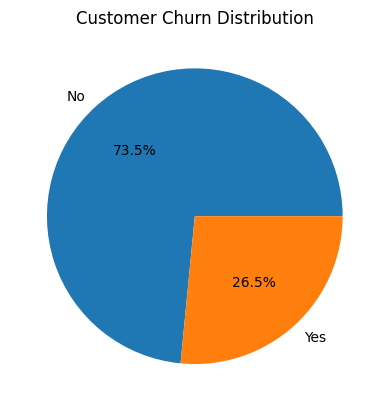

In [ ]:
# Count the number of customers who are churning
churn_counts =data['Churn'].value_counts()

# Create a pie-chart to show the distribution of customers who are churning
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Customer Churn Distribution')
plt.show()

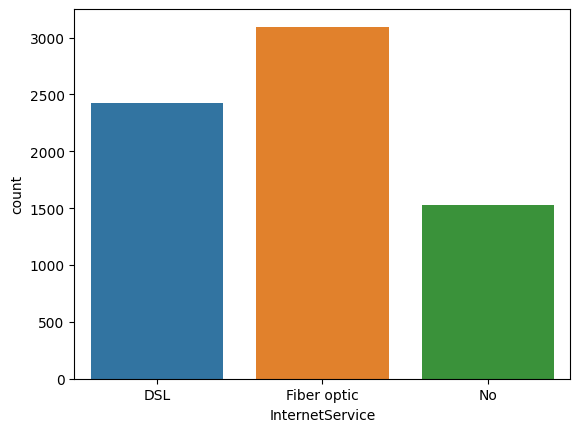

In [ ]:
# Build a bar-plot to show the distribution of ‘Internet Service’
sns.countplot(data=data,x='InternetService')
plt.show()

# Model Building

In [ ]:
data['Churn'] =data['Churn'].map({'Yes':1,'No':0})

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['tenure'], data['Churn'], test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(12, input_shape=(1,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.input_shape , model.output_shape

((None, 1), (None, 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert the BinaryCrossentropy loss function to a Tensor
loss_function = tf.keras.losses.BinaryCrossentropy()

# Compile the model
model.compile(loss=loss_function, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))




Epoch 1/150
564/564 [==============================] - 3s 4ms/step - loss: 0.5336 - accuracy: 0.7467 - val_loss: 0.5016 - val_accuracy: 0.7566
Epoch 2/150
564/564 [==============================] - 2s 3ms/step - loss: 0.5240 - accuracy: 0.7506 - val_loss: 0.5034 - val_accuracy: 0.7346
Epoch 3/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5200 - accuracy: 0.7387 - val_loss: 0.5013 - val_accuracy: 0.7566
Epoch 4/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5222 - accuracy: 0.7442 - val_loss: 0.5144 - val_accuracy: 0.7566
Epoch 5/150
564/564 [==============================] - 1s 3ms/step - loss: 0.5235 - accuracy: 0.7414 - val_loss: 0.5494 - val_accuracy: 0.7544
Epoch 6/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5206 - accuracy: 0.7449 - val_loss: 0.4979 - val_accuracy: 0.7353
Epoch 7/150
564/564 [==============================] - 1s 3ms/step - loss: 0.5223 - accuracy: 0.7472 - val_loss: 0.4995 - val_accuracy: 0.7573

In [ ]:
# Predict the values on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',cm)



45/45 [==============================] - 0s 2ms/step
Confusion Matrix: 
 [[930 106]
 [239 134]]


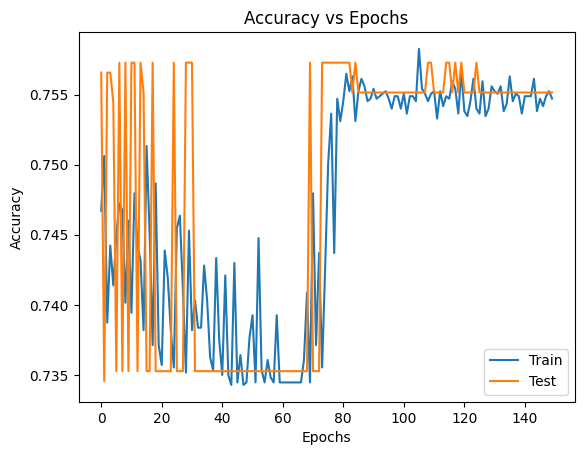

In [ ]:
# Plot the accuracy vs epochs graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Model 2

In [ ]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['tenure'], data['Churn'], test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(12, input_shape=(1,), activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                24        
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Convert the BinaryCrossentropy loss function to a Tensor
loss_function = tf.keras.losses.BinaryCrossentropy()

# Compile the model
model.compile(loss=loss_function, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))




Epoch 1/150
564/564 [==============================] - 2s 3ms/step - loss: 0.6611 - accuracy: 0.6699 - val_loss: 0.5386 - val_accuracy: 0.7353
Epoch 2/150
564/564 [==============================] - 2s 3ms/step - loss: 0.5573 - accuracy: 0.7261 - val_loss: 0.5267 - val_accuracy: 0.7353
Epoch 3/150
564/564 [==============================] - 1s 3ms/step - loss: 0.5365 - accuracy: 0.7323 - val_loss: 0.5130 - val_accuracy: 0.7353
Epoch 4/150
564/564 [==============================] - 2s 4ms/step - loss: 0.5379 - accuracy: 0.7346 - val_loss: 0.5164 - val_accuracy: 0.7353
Epoch 5/150
564/564 [==============================] - 2s 4ms/step - loss: 0.5308 - accuracy: 0.7345 - val_loss: 0.5160 - val_accuracy: 0.7353
Epoch 6/150
564/564 [==============================] - 2s 3ms/step - loss: 0.5296 - accuracy: 0.7345 - val_loss: 0.5052 - val_accuracy: 0.7353
Epoch 7/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5318 - accuracy: 0.7345 - val_loss: 0.5257 - val_accuracy: 0.7353

In [ ]:
# Predict the values on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',cm)

45/45 [==============================] - 0s 1ms/step
Confusion Matrix: 
 [[1036    0]
 [ 373    0]]


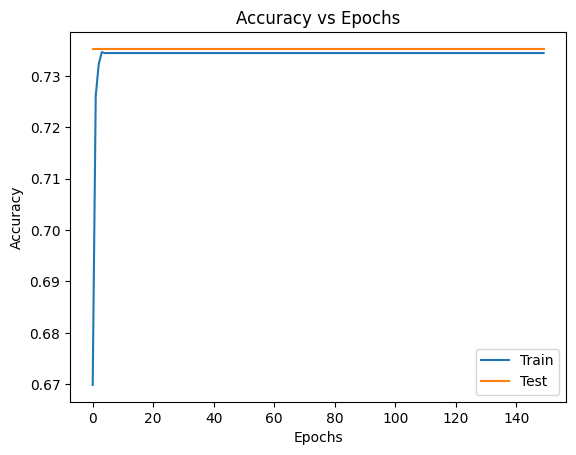

In [ ]:
# Plot the accuracy vs epochs graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
X = data[['tenure','MonthlyCharges','TotalCharges']]
y = data['Churn']

In [ ]:
X.shape,y.shape

((7043, 3), (7043,))

In [ ]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(12, input_shape=(1,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Convert the BinaryCrossentropy loss function to a Tensor
loss_function = tf.keras.losses.BinaryCrossentropy()

# Compile the model
model.compile(loss=loss_function, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
import pandas as pd
import numpy as np

# Replace empty strings with NaN values
data = data.replace('', np.nan)

# Fill in any NaN values with a default value (such as 0.0)
data = data.fillna(0.0)

# Convert the DataFrame to NumPy arrays
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Convert the input data to float data type and fit the model
history = model.fit(X, y, epochs=150, batch_size=10, validation_data=(X_test, y_test))


